In [1]:
import numpy as np

In [2]:
"""
Rosenbrock関数とその勾配ベクトルを定義する関数群。
この関数は最適化アルゴリズム（最急降下法・共役勾配法など）の性能評価によく使われる。
非線形で狭い谷構造を持ち、数値最適化手法の収束挙動を確認するベンチマーク関数である。
"""


def func_rosen(x):
    """
    Rosenbrock関数（目的関数値 f(x)）を返す。

    Parameters
    ----------
    x : ndarray
        評価点ベクトル（通常は2次元）

    Returns
    -------
    float
        Rosenbrock関数の値
        f(x) = (x₁ - 1)² + 100(x₁² - x₂)²
    """
    return (x[0] - 1) ** 2 + 100 * (x[0] ** 2 - x[1]) ** 2


def grad_rosen(x):
    """
    Rosenbrock関数の勾配 ∇f(x) を返す。

    Parameters
    ----------
    x : ndarray
        評価点ベクトル（通常は2次元）

    Returns
    -------
    ndarray
        勾配ベクトル
        ∇f(x) = [
            400x₁³ - 400x₁x₂ + 2x₁ - 2,
            -200(x₁² - x₂)
        ]
    """
    return np.array(
        [400 * x[0] ** 3 - 400 * x[0] * x[1] + 2 * x[0] - 2, -200 * (x[0] ** 2 - x[1])]
    )

In [3]:
from code3_1v2 import *  # 最急降下法（点列のログを残すバージョン）のコードを読み込み
from code3_2v2 import *  # 非線形共役勾配法（点列のログを残すバージョン）のコードを読み込み

SD, iter: 1000 f(x): 0.0017167182857613253
CG(HS), iter: 56 f(x): 3.259770475599526e-27


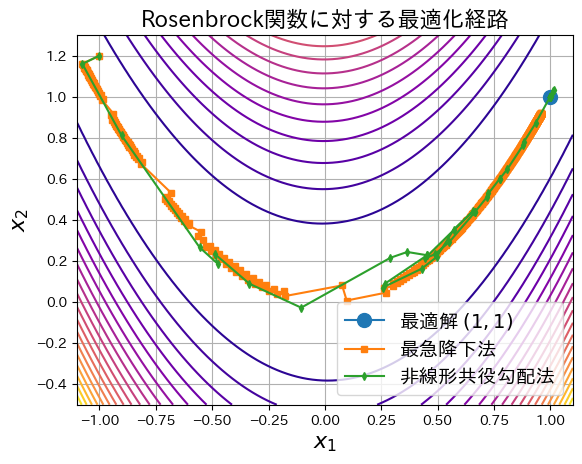

In [4]:
# ------------------------------------------------------------
# コード3.x ■ Rosenbrock関数の等高線プロットと最適化経路の可視化
# このプログラムは、Rosenbrock関数に対して
# 最急降下法および非線形共役勾配法（HS法）を適用し、
# それぞれの探索経路を等高線上にプロットして比較する。
# ------------------------------------------------------------

# Jupyter Notebook用設定
%matplotlib inline

import matplotlib.pyplot as plt  # 図の描画ライブラリ
import japanize_matplotlib       # プロットに日本語を使うためのライブラリ
import numpy as np

# ------------------------------------------------------------
# (1) Rosenbrock関数の等高線を描くためのデータ作成
# ------------------------------------------------------------
# x₁ ∈ [-1.1, 1.1], x₂ ∈ [-0.5, 1.3] の範囲でグリッドを作成
X, Y = np.meshgrid(np.linspace(-1.1, 1.1, 100),
                   np.linspace(-0.5, 1.3, 100))

# 各格子点 (x, y) における Rosenbrock 関数値を計算
Z = np.array([[func_rosen(np.array([x, y])) for x, y in zip(vx, vy)]
              for vx, vy in zip(X, Y)])

# 等高線図を作成（cmap='plasma' で色付け、20段階で描画）
plt.contour(X, Y, Z, cmap='plasma', levels=np.linspace(np.min(Z), np.max(Z), 20))

# ------------------------------------------------------------
# (2) 最急降下法と非線形共役勾配法の適用
# ------------------------------------------------------------
x_0 = np.array([-1, 1.2])  # 初期点 x₀ = (-1, 1.2)^T

# 最急降下法（Steepest Descent）による探索
sequenceSD = SteepestDescent(func_rosen, grad_rosen, x_0)

# 非線形共役勾配法（Hestenes-Stiefel法）による探索
sequenceCG = CG_HS(func_rosen, grad_rosen, x_0)

# ------------------------------------------------------------
# (3) Rosenbrock関数の等高線上に各点列を重ねてプロット
# ------------------------------------------------------------
# 最適解 (1,1) をマーカー付きで表示
plt.plot(1, 1, marker='o', markersize=10, label='最適解 $(1, 1)$')

# 最急降下法の探索経路を四角マーカーで表示
plt.plot(sequenceSD[:, 0], sequenceSD[:, 1],
         marker='s', markersize=4, label='最急降下法')

# 非線形共役勾配法の探索経路を菱形マーカーで表示
plt.plot(sequenceCG[:, 0], sequenceCG[:, 1],
         marker='d', markersize=4, label='非線形共役勾配法')

# ------------------------------------------------------------
# (4) 軸ラベル・凡例などの設定
# ------------------------------------------------------------
plt.legend(fontsize=14)
plt.xlabel(r'$x_1$', fontsize=16)
plt.ylabel(r'$x_2$', fontsize=16)
plt.title('Rosenbrock関数に対する最適化経路', fontsize=16)
plt.grid(True)
plt.show()